<a href="https://colab.research.google.com/github/mariareginav/intro_python_verao_ime_2023/blob/master/Trabalho_Final_IME_Ver%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yahooquery
!pip install yahooFinancials
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas
!pip install pandas_datareader
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yahoofinancials
!pip3 install yfinance==0.2.4
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 1.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
  Created wheel for yahooFinancials: filename=yahoofinancials-1.12-py3-none-any.whl size=20697 sha256=8000c28e7068409bb2abe1a97f31c62ce1746d5e82050649020fd6bae519112c
  Stored in directory: /root/.cache/pip/wheels/84/48/ab/f4565cce02c188008cf32a090a458e2f2884b19f3195122c06
Successfully built yahooFinancials
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successful

1) Quais os retornos logaritmicos dos últimos 2 anos da Americanas? É possível observar grandes variações no último semestre de 2022?

In [3]:
from yahooquery import Ticker
import pandas_datareader as pdr
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yahoofinancials as yf
from yahoofinancials import YahooFinancials
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

In [4]:
start_date = "2021-01-01"
end_date   = "2023-01-01"
yf.pdr_override()
stock = ['AMER3.SA']
data_inicial = datetime(2021,1,1)
data_final = datetime(2023,1,1)
dados = pdr.get_data_yahoo(stock, start=data_inicial, end=data_final)
print(dados)

[*********************100%***********************]  1 of 1 completed
                                Open       High        Low      Close  \
Date                                                                    
2021-01-04 00:00:00-03:00  76.910004  77.029999  73.849998  75.180000   
2021-01-05 00:00:00-03:00  75.230003  75.290001  72.650002  73.500000   
2021-01-06 00:00:00-03:00  73.459999  73.599998  68.589996  68.699997   
2021-01-07 00:00:00-03:00  68.910004  70.419998  66.860001  67.309998   
2021-01-08 00:00:00-03:00  67.800003  72.580002  67.400002  72.000000   
...                              ...        ...        ...        ...   
2022-12-23 00:00:00-03:00   9.190000   9.690000   9.070000   9.180000   
2022-12-26 00:00:00-03:00   9.210000   9.380000   8.910000   9.340000   
2022-12-27 00:00:00-03:00   9.380000   9.550000   8.970000   9.160000   
2022-12-28 00:00:00-03:00   9.220000   9.900000   9.160000   9.720000   
2022-12-29 00:00:00-03:00   9.720000  10.030000   9.360

In [5]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-03:00,76.910004,77.029999,73.849998,75.180000,73.699677,2820700
2021-01-05 00:00:00-03:00,75.230003,75.290001,72.650002,73.500000,72.052757,3881300
2021-01-06 00:00:00-03:00,73.459999,73.599998,68.589996,68.699997,67.347267,7548200
2021-01-07 00:00:00-03:00,68.910004,70.419998,66.860001,67.309998,65.984634,8573900
2021-01-08 00:00:00-03:00,67.800003,72.580002,67.400002,72.000000,70.582291,7263500


In [6]:
dados.index = dados.index.tz_localize(None)
dados.to_excel('DADOS_PRECOS_Pandas.xlsx')

In [7]:
dados['Return'] = np.log(dados['Adj Close'] / dados['Adj Close'].shift(1))
dados.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2021-01-04,76.910004,77.029999,73.849998,75.180000,73.699677,2820700,NaN
2021-01-05,75.230003,75.290001,72.650002,73.500000,72.052757,3881300,-0.022600
2021-01-06,73.459999,73.599998,68.589996,68.699997,67.347267,7548200,-0.067536
2021-01-07,68.910004,70.419998,66.860001,67.309998,65.984634,8573900,-0.020440
2021-01-08,67.800003,72.580002,67.400002,72.000000,70.582291,7263500,0.067357


In [8]:
dados = dados.dropna()
dados.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2021-01-05,75.230003,75.290001,72.650002,73.500000,72.052757,3881300,-0.022600
2021-01-06,73.459999,73.599998,68.589996,68.699997,67.347267,7548200,-0.067536
2021-01-07,68.910004,70.419998,66.860001,67.309998,65.984634,8573900,-0.020440
2021-01-08,67.800003,72.580002,67.400002,72.000000,70.582291,7263500,0.067357
2021-01-11,71.010002,71.639999,69.739998,71.309998,69.905876,4283200,-0.009630


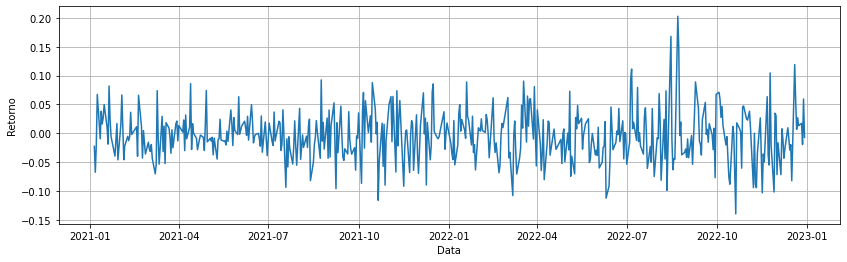

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(dados.Return)
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.grid(True)